In [3]:
## Read all results from files

from os import listdir
import re
import json

def load_results(source, freq):
    classes = {0: {},
               1: {},
               2: {},
               3: {}}
    
    for name in sorted(listdir(source)):
        filename = source + '/' + name
        if not filename.endswith('.json'):
            continue
#         pattern = 'algs' + freq + '_0_0' + 'hz.json'
#         print(pattern)
#         match = re.search(pattern, name)
#         if not match:
            continue
#         print(filename)
        #df = read_json(filename)
        with open(filename) as json_file:
            print(filename)
            data = json.load(json_file)
            for key in data:
                for activity in classes:
                    if not key in classes[activity]:
                        classes[activity][key] = []
                    classes[activity][key].append(data[key][activity])
            json_file.close()
    return classes

classes = load_results('results', '5')
print(classes)

results/algs_05_0_0.json
results/algs_10_0_0.json
results/algs_20_0_0.json
{0: {'bayes': [0.09610245000652079, 0.1245010948988253, 0.276252402293029], 'bag': [0.6128309241733177, 0.6174869211927945, 0.6115448666342469], 'cart': [0.5817341474992928, 0.5874992419250327, 0.5945378383964265], 'et': [0.6224583106831196, 0.6227420237651066, 0.6201608097121136], 'gbm': [0.6556891153636908, 0.6550804821661871, 0.6525233923646772], 'knn': [0.6469431697813199, 0.639559037695696, 0.637397998005972], 'svm': [0.5040584874874079, 0.5547619688956593, 0.5749390524251063], 'rf': [0.6309913175696693, 0.6218731720230202, 0.6174760736873989]}, 1: {'bayes': [0.653817531370584, 0.6581906028849916, 0.6851856749230507], 'bag': [0.6705766401004576, 0.6697158324954273, 0.6727764192397996], 'cart': [0.6149151609051419, 0.6326020777091723, 0.6337371098455034], 'et': [0.6795080154482288, 0.676853814497583, 0.6738360063927926], 'gbm': [0.690326175506297, 0.6822583636659071, 0.6810089763800591], 'knn': [0.6991124073

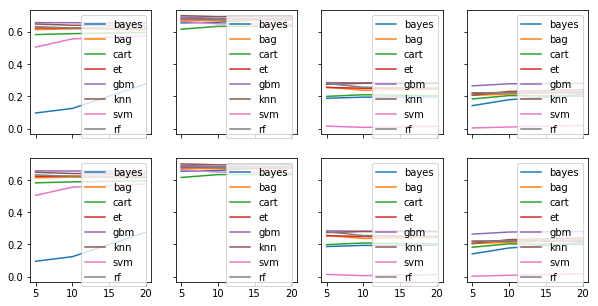

In [28]:
import matplotlib.pyplot as plt

sample_rates = [5, 10, 20]

fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(10,5))

legends = []
labels = []

for i in range(2):
    for activity in classes:
        for algo in classes[activity]:
            legend, = ax[i, activity].plot(sample_rates, classes[activity][algo], label=algo)
    #         legends.append(legend)
    #         labels.append()
            ax[i, activity].legend(loc="upper right")

# plt.legend(l, classes.keys())
# plt.show()

In [41]:
# Many of the best combinations seems to be between 30-60 freq with half a second window size
# For class 2 and 3 though, across algorithms, using 1-2 second window sizes seem to perform better
# Do the same with a random/naive classifier and that will be our threshold

# Get the combinations with the highest F1 per class and F1-macro scores
from os import listdir
from os import path
import re
import csv
from pandas import read_csv

source = 'results/'

stats = dict()

for name in listdir(source):
    filename = source + name
    if not name.endswith('.csv'):
        continue
    alg = re.search('(.+?).csv', name)
    if alg:
        alg = alg.group(1)

    df = read_csv(filename)
    idx = df['macro f1'].idxmax()
    print(alg, 'max macro f1', df['macro f1'][idx], df['comb'][idx])
    idx = df['f1-0'].idxmax()
    print(alg, 'max f1-0', df['f1-0'][idx], df['comb'][idx])
    idx = df['f1-1'].idxmax()
    print(alg, 'max f1-1', df['f1-1'][idx], df['comb'][idx])
    idx = df['f1-2'].idxmax()
    print(alg, 'max f1-2', df['f1-2'][idx], df['comb'][idx])
    idx = df['f1-3'].idxmax()
    print(alg, 'max f1-3', df['f1-3'][idx], df['comb'][idx])

svm max macro f1 0.3272184911640215 10_5_4
svm max f1-0 0.6445092214591546 60_30_23
svm max f1-1 0.7250465421813901 60_30_0
svm max f1-2 0.025312090657589305 5_3_2
svm max f1-3 0.002205679625034464 10_5_4
cart max macro f1 0.5584620918909411 10_20_10
cart max f1-0 0.7036727881192051 10_20_10
cart max f1-1 0.7677388880370225 30_15_8
cart max f1-2 0.4005455314352396 30_60_45
cart max f1-3 0.4194936236602904 30_45_11
bayes max macro f1 0.4950872155412695 30_60_15
bayes max f1-0 0.6156373507026847 60_30_8
bayes max f1-1 0.6978848681966552 5_5_3
bayes max f1-2 0.471457326031427 60_120_30
bayes max f1-3 0.4265786472509188 30_60_15
rf max macro f1 0.6166723589467971 30_30_22
rf max f1-0 0.7476608707642475 50_25_19
rf max f1-1 0.8121445019733482 50_25_19
rf max f1-2 0.4912884394482664 30_45_34
rf max f1-3 0.5007345418737438 50_100_75
knn max macro f1 0.5720768156571885 30_15_11
knn max f1-0 0.6794697995145844 5_10_0
knn max f1-1 0.7818862348770153 30_15_11
knn max f1-2 0.5324940548448276 50_25

In [3]:
# Code running experiments with different models and parameters
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from sklearn.metrics import balanced_accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# GridSearchCV results for all algorithms
# GridSearchCV with the best combination for all algorithms
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GridSearchCV

def evaluate_model(trainX, trainy, testX, testy, model):
    trainy, testy = trainy[:,0], testy[:,0]

    # fit the model
    model.fit(trainX, trainy)
    # make predictions
    yhat = model.predict(testX)

#     hat, test = 0,0
#     for i in range(len(yhat)):
#         if yhat[i] == 0:
#             hat += 1
#         if testy[i][0] == 0:
#             test += 1
#     print('hat', hat)
#     print('test', test)
    # evaluate predictions
#     accuracy = balanced_accuracy_score(testy, yhat)
    f1_macro = f1_score(testy, yhat, average='macro')
    f1_micro = f1_score(testy, yhat, average='micro')
    f1 = f1_score(testy, yhat, average=None)

#     print('accuracy:', accuracy)
#     print(classification_report(testy, yhat))
#     print(confusion_matrix(testy, yhat))
    return f1, f1_macro, f1_micro, model

def run_nested_logo(X_all, y_all, all_df, groups):
    logo = LeaveOneGroupOut()
    group = 0

    f1s = []
    f1_macros = []
    f1_micros = []
    best_params = []
    best_scores = []

    clf = ExtraTreesClassifier()
    params = {'n_estimators': [100, 200, 300],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 10, 20, 50],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 5, 10],
              'max_features': ['auto', 'sqrt', 'log2', None]}
    for train_index, test_index in logo.split(X_all, groups=groups):
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        
        inner_groups = all_df.iloc[all_df.index.isin(train_index)]['name']

#         print(inner_groups)
        grid_obj = GridSearchCV(clf, params, scoring='f1_macro', cv=logo.split(X_train, groups=inner_groups), n_jobs=-1)
        f1, f1_macro, f1_micro, grid_obj = evaluate_model(X_train, y_train, X_test, y_test, grid_obj)
        print('Group', group)
        print(best_params_)
        print(best_score_)
        best_params.append(grid_obj.best_params_)
        best_scores.append(grid_obj.best_score_)
        group += 1
        
    print(best_params)
    print(best_scores)
    return grid_obj, best_params, best_scores


In [4]:
import pandas as pd

train_df = pd.read_csv('../data/processed/sklearn/train50_50_38.csv')
X_all = train_df.drop(['state', 'name'], axis=1)
y_all = pd.DataFrame(train_df['state'])
groups = train_df['name']

results = run_nested_logo(X_all, y_all, train_df, groups)


KeyboardInterrupt: 

In [11]:
print(results[0])

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x7f76668d3200>,
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n

In [13]:
logo = LeaveOneGroupOut()
i = 0
for train_index, test_index in logo.split(X_all, groups=groups):
    i += 1
    X_train, X_test = X_all.values[train_index], X_all.values[test_index]
    y_train, y_test = y_all.values[train_index], y_all.values[test_index]
    y_hat = results[0].best_estimator_.predict(X_test)
    print(classification_report(y_test, y_hat))
    if i == 0:
        continue

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1816
           1       0.91      0.96      0.93      2660
           2       0.73      0.61      0.66       320
           3       0.75      0.62      0.68       284

    accuracy                           0.90      5080
   macro avg       0.83      0.78      0.80      5080
weighted avg       0.90      0.90      0.90      5080

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1253
           1       0.97      0.96      0.96      1468
           2       0.96      0.76      0.85       233
           3       0.93      0.80      0.86       312

    accuracy                           0.94      3266
   macro avg       0.94      0.88      0.91      3266
weighted avg       0.94      0.94      0.94      3266

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       880
           1       0.

In [2]:
# Code running experiments with different models and parameters
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from sklearn.metrics import balanced_accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
## Correct way to do nested LOOCV
# nested LOOCV with the all combis and hyperparameter tuning
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from os import listdir
from os import path
import re
import csv

def evaluate_model(trainX, trainy, testX, testy, model):
    trainy, testy = trainy[:,0], testy[:,0]

    # fit the model
    model.fit(trainX, trainy)
    # make predictions
    yhat = model.predict(testX)
    print(yhat)

#     hat, test = 0,0
#     for i in range(len(yhat)):
#         if yhat[i] == 0:
#             hat += 1
#         if testy[i][0] == 0:
#             test += 1
#     print('hat', hat)
#     print('test', test)
    # evaluate predictions
#     accuracy = balanced_accuracy_score(testy, yhat)
    f1_macro = f1_score(testy, yhat, average='macro')
    f1 = f1_score(testy, yhat, average=None)

#     print('accuracy:', accuracy)
#     print(classification_report(testy, yhat))
#     print(confusion_matrix(testy, yhat))
    return f1, f1_macro, model

def run_nested_logo(source, dest, key):
    logo = LeaveOneGroupOut()

    i = 1
    
    for name in listdir(source):
        filename = source + '/' + name
        if not name.endswith('csv') or not name.startswith('train'):
            continue
        pattern = 'train' + '[0-9]*[0-9]_[0-9]*[0-9]_[0-9]*[0-9]' + '.csv'
        match = re.search(pattern, name)
        if not match:
            continue

        combi = re.search('train(.+?).csv', name)
        print(combi)
        if combi:
            combi = combi.group(1)
        print(combi)

        print(i, 'out of 79 files')
        print('Reading file', name)

        all_df = pd.read_csv(filename)

        X_all = all_df.drop(['state', 'name'], axis=1)
        y_all = pd.DataFrame(all_df['state'])
#         y_all = to_categorical(y_cat)
#         print(y_all)
        groups = all_df['name']
        
        n_features = X_all.shape[1]

        # counting the number of samples per class
        freq = [0,0,0,0]
        for val in y_all['state']:
            freq[val] += 1

        print('class frequencies', freq)
    
        group = 0
        
        f1s = []
        f1_macros = []
        best_params = []
        best_scores = []
    
        for train_index, test_index in logo.split(X_all, groups=groups):
            X_train, X_test = X_all.values[train_index], X_all.values[test_index]
            y_train, y_test = y_all.values[train_index], y_all.values[test_index]
#             y_test  = y_cat.values[test_index]

            inner_groups = all_df.iloc[all_df.index.isin(train_index)]['name']

            clf = KNeighborsClassifier()
            params = {}
            params = {'n_neighbors': [5, n_features, 2*n_features],
                      'weights': ['uniform', 'distance'],
                      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                      'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']}
            grid_obj = RandomizedSearchCV(clf, params, scoring='f1_macro', cv=logo.split(X_train, groups=inner_groups), n_jobs=-1)
            f1, f1_macro, grid_obj = evaluate_model(X_train, y_train, X_test, y_test, grid_obj)
            print('Group', group)
            print(grid_obj.best_params_)
            print(f1)
            print('macro', f1_macro)
            print(grid_obj.best_score_)
            f1s.append(f1)
            f1_macros.append(f1_macro)
            best_params.append(grid_obj.best_params_)
            best_scores.append(grid_obj.best_score_)
                        
            group += 1

        header = ['comb']
        row = [combi]
        
        # create header
        for j in range(9):
            header.append('f1-0'+'.'+str(j))
            header.append('f1-1'+'.'+str(j))
            header.append('f1-2'+'.'+str(j))
            header.append('f1-3'+'.'+str(j))
            header.append('macro'+'.'+str(j))
            header.append('best_score_'+'.'+str(j))
            header.append('hyper'+'.'+str(j))
            
            row.extend(f1s[j])
            row.append(f1_macros[j])
            row.append(best_scores[j])
            row.append(best_params[j])

        outFilename = dest + '/' + key + '.csv'
        if not path.isfile(outFilename):
            print('creating new file', outFilename)
            with open(outFilename, 'w') as outFile:
                writer = csv.writer(outFile)
                writer.writerow(header)
                writer.writerow(row)
                outFile.close()
        else:
            print('opening existing file', outFilename)
            with open(outFilename, 'a+') as outFile:
                writer = csv.writer(outFile)
                writer.writerow(row)
                outFile.close()
        i += 1
#     return np.average(f1s, axis=0).tolist(), [np.average(f1_macros).tolist()], [np.average(f1_micros).tolist()], best_params, best_scores
    return 0

source = '../data/processed/sklearn/'
dest = 'results/'
run_nested_logo(source, dest, 'knn')


<_sre.SRE_Match object; span=(0, 16), match='train30_15_4.csv'>
30_15_4
<_sre.SRE_Match object; span=(0, 15), match='train10_5_1.csv'>
10_5_1
<_sre.SRE_Match object; span=(0, 14), match='train5_3_2.csv'>
5_3_2
<_sre.SRE_Match object; span=(0, 16), match='train60_30_8.csv'>
60_30_8
<_sre.SRE_Match object; span=(0, 16), match='train60_90_0.csv'>
60_90_0
<_sre.SRE_Match object; span=(0, 14), match='train5_5_4.csv'>
5_5_4
<_sre.SRE_Match object; span=(0, 17), match='train30_45_23.csv'>
30_45_23
<_sre.SRE_Match object; span=(0, 14), match='train5_5_0.csv'>
5_5_0
<_sre.SRE_Match object; span=(0, 16), match='train30_30_8.csv'>
30_30_8
<_sre.SRE_Match object; span=(0, 17), match='train60_90_68.csv'>
60_90_68
<_sre.SRE_Match object; span=(0, 18), match='train50_100_75.csv'>
50_100_75
<_sre.SRE_Match object; span=(0, 17), match='train30_30_15.csv'>
30_30_15
<_sre.SRE_Match object; span=(0, 18), match='train60_120_90.csv'>
60_120_90
<_sre.SRE_Match object; span=(0, 16), match='train10_10_8.csv'>


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 ... 1 1 1]
Group 0
{'metric': 'chebyshev', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'kd_tree'}
[0.80917874 0.86153846 0.47457627 0.67625899]
macro 0.7053881173730026
0.510310456290287


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 3 1 0 0 0 0 0 0 2 0 1 0 0 0 0 0 3 1 1 1 1 1 1 1 0 1 0 2 0 0 0 0 0 3 1 0 1
 1 1 0 1 1 0 3 0 0 0 0 0 0 0 2 0 0 1 1 1 1 1 1 2 0 0 0 0 0 0 0 3 1 1 0 1 1
 1 1 1 1 1 1 3 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 3 0 1 1 1 0 1 0 1 1 0 0
 0 0 0 3 3 3 1 1 1 1 1 1 0 0 0 0 0 3 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1
 1 1 1 1 1 2 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 0 0 0 0 3 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 2 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 3 1 0 1 1 1 1 1 1 1 1 1 3 1 0 0 0 0 0 0 0 3
 1 0 1 1 1 0 1 1 2 0 0 0 0 0 0 0 0 0 3 0 0 1 1 1 1 1 1 1 1 2 0 1 0 0 0 0 0
 0 1 3 1 1 1 1 1 1 1 3 0 0 0 0 0 0 0 0 2 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 2 0 0 0 0 0 0
 0 1 1 0 1 1 1 1 1 2 0 0 0 0 0 0 0 0 3 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 0 0 0 3 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 3 0 0 0 1 2 0 0 0 3
 1 0 0 3 0 0 0 1 3 1 0 0 2 0 0 0 0 0 0 0 2 0 0 1 3 1 1 0 0 0 0 1 3 1 0 0 0
 2 0 1 1 2 2 0 0 0 0 3 1 1 0 1 1 0 0 0 0 0 0 0 2 1 1 1 0 0 1 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 1 0 0 1 1 0 1 2 0 0 0 0 0 3 1 1 1 1 0 1 2 0 0 0 1 1 0 0 1 2
 0 0 0 1 0 0 0 3 1 1 0 0 1 0 0 0 0 1 1 1 1 2 0 0 0 0 0 1 1 0 0 1 1 1 2 0 0
 0 0 0 1 1 1 1 1 0 2 0 1 0 0 0 0 0 0 1 1 1 3 3 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 2 1 0 0 0 3 0 1 0 2 1 1 0 0 0
 3 1 0 0 1 1 1 0 0 0 0 0 0 3 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 2 0 0 0 0 3 1 0
 1 2 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 2 0 0 0 0 0 3 0 0 0 2 1 0 0 0
 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 3 1 1 1 1 1 3 2 1 0 0 0 0
 3 1 1 0 1 2 1 0 0 0 0 0 1 1 0 2 1 1 0 0 1 1 1 1 0 0 1 2 1 0 0 0 0 0 1 0 3
 1 0 0 0 0 2 0 0 0 1 3 1 0 0 0 0 2 1 1 1 0 3 1 0 0 0 0 0 2 0 1 0 0 0 0 1 3
 1 0 0 2 0 0 0 0 0 1 1 0 0 0 3 1 0 1 1 1 3 1 0 0 0 0 1 3 1 0 1 1 2 1 0 0 0
 3 1 1 0 0 0 3 1 0 0 0 0 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 0 0 1 0 1 1 0 1 0 0 0 0 0 2 0 1 1 1 0 2 1 0 0 0 1 1 1 0 0 1 1 1 3 1 0 0
 0 0 2 0 0 1 0 2 0 0 0 0 2 1 0 1 1 0 1 0 2 0 0 0 0 0 0 1 1 0 1 1 1 2 0 0 0
 0 0 0 3 0 0 1 0 0 0 0 0 0 0 1 3 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0
 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 2 0 0 0 1 2 0 0 0 0 0 0 0 0 0 1
 1 1 2 1 0 0 0 1 0 1 1 1 1 0 0 0 0 2 1 0 0 1 0 0 0 1 0 0 0 1 1 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 2 1 0 0 0 0 1 1 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 2 0 0 0 3 1 0 1 3 1 1 0 0 1 1 0 1 2 1 0 0 1 0 0 0 2 0 0 0 1 1 0 0 2 0 0 3
 1 1 0 0 1 1 2 0 0 0 0 0 1 1 0 0 0 1 3 1 0 0 0 3 1 0 0 0 2 0 0 0 0 0 1 3 1
 0 1 0 1 1 1 2 0 0 0 0 3 1 0 0 3 0 0 0 0 3 1 1 0 0 0 0 0 0 0 2 1 1 0 1 3 3
 0 0 0 0 3 0 0 0 0 2 0 1 0 0 0 3 1 0 1 1 1 1 0 0 0 3 1 1 1 1 1 2 0 0 0 0 0
 0 2 3 1 1 0 1 0 2 0 1 0 0 3 1 0 0 0 0 1 3 1 1 0 2 1 0 0 0 0 2 3 1 0 0 0 0
 0 0 3 1 1 1 2 0 0 0 0 0 0 0 0 0 1 2 0 0 0 2 2 0 1 0 0 0 0 2 0 1 0 0 0 1 1
 0 1 1 2 0 0 0 0 0 0 0 1 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 1 1 1 1 1 2 0 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 2 0
 1 1 1 1 1 3 1 1 1 1 1 1 1 2 0 1 1 1 1 1 3 1 1 1 1 1 0 1 1 1 1 1 1 3 1 1 1
 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1 1 0 0 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 2 0 1 1 1 1 1 0 1 1 1 1 1 3 1 1 1 1 1 3 1 1 1 1 1 0 0 1 1 1
 1 3 1 1 1 1 1 0 0 1 1 1 1 1 3 1 1 1 1 1 1 2 0 1 1 1 1 3 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 3 1 1 1 1 1 1 2 0 1 1 1 3 3
 1 1 1 1 1 2 0 0 1 1 1 1 1 2 0 1 1 1 0 0 1 1 1 1 1 1 1 3 1 1 1 1 1 2 0 1 1
 1 3 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1
 1 2 0 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 3 1 1 1
 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 0 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1
 1 1 1 3 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 0 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 3 3 1 1
 1 1 2 0 1 1 1 1 1 1 1 1 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 0 2 0 0 0 0 0 0 1 3 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 0 1 1 1 1
 1 1 1 1 0 0 0 0 0 2 0 1 1 1 1 1 1 0 1 0 0 0 0 3 1 1 1 1 1 1 1 2 0 0 0 0 0
 0 3 2 0 1 1 1 1 3 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 2 0 0 0 0 0 3 1 1 1 1 1 1
 1 1 2 1 0 0 0 0 0 0 0 2 0 1 1 1 1 1 1 2 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 2 0
 0 0 0 0 3 1 1 0 0 1 1 0 1 1 0 0 2 0 1 0 0 0 0 3 1 0 1 1 1 1 0 0 0 0 0 0 0
 2 0 0 1 1 1 3 0 0 0 0 0 3 1 0 1 1 1 1 3 1 1 0 0 0 0 3 1 0 1 1 1 1 2 0 0 0
 0 0 0 0 2 0 1 1 1 1 1 0 2 0 0 0 0 0 0 3 0 1 1 1 1 2 0 1 0 0 0 0 0 2 0 1 1
 1 1 1 1 0 1 0 0 0 0 0 3 1 0 1 1 1 1 1 1 2 1 0 0 0 0 0 0 3 1 0 1 1 3 2 0 1
 0 0 0 2 0 0 1 1 1 1 1 2 1 0 0 0 0 3 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 2 0 1 1
 1 1 1 1 1 3 1 0 0 0 0 2 0 0 0 3 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 3 1 0 0 0 0 0 0 2 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 3 1 0 1 1 1 1 1 2 0
 1 0 0 0 0 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 0 0 0 2 2 0 1 1 1 1 1 2 0 1 0 0
 0 0 0 0 3 1 0 1 1 1 1 2 0 1 0 0 0 0 0 0 3 1 0 1 1 1 1 1 1 0 2 0 0 0 0 0 0
 0 3 1 1 1 1 1 1 1 0 1 0 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 0 2 0 1 1 1 1 1 1 1
 1 1 1 1 3 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 3 1 1 1 1 1 1 1 1 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 3 0 1 1 1 1 3 1 1 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 0 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 3 3 1 1 1 1 1 1 1 1 1 1 2 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1
 1 1 3 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 1 1 1 1 1 1 1 1 1 1 1 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 1 ... 1 1 1]
Group 7
{'metric': 'chebyshev', 'weights': 'uniform', 'n_neighbors': 5, 'algorithm': 'kd_tree'}
[0.83786506 0.83822138 0.58646617 0.50434783]
macro 0.6917251070389858
0.5226808895339407


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 1 1 1 0 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 0 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 0 0 1 3 1 1 2 0 1 1 1 3 1 1 1 1 1 1
 2 0 0 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1
 1 2 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1
 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 2 1 1 1 1]
Group 8
{'metric': 'minkowski', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'brute'}
[0.47311828 0.778157   0.45454545 0.11111111]
macro 0.45423296045337225
0.4784406712699788
opening existing file results//knn.csv
<_sre.SRE_Match object; span=(0, 15), match='train10_5_0.csv'>
10_5_0
2 out of 79 files
Reading file train10_5_0.csv
class frequencies [5813, 6610, 993, 1017]


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 ... 1 1 1]
Group 0
{'metric': 'minkowski', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'brute'}
[0.85665334 0.88125467 0.45248869 0.56140351]
macro 0.6879500512912999
0.5233717819362623


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 1 0 ... 1 1 1]
Group 1
{'metric': 'manhattan', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'kd_tree'}
[0.84818247 0.8583815  0.30573248 0.30208333]
macro 0.5785949466109793
0.5337866214003784


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 0 ... 1 1 0]
Group 2
{'metric': 'euclidean', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'ball_tree'}
[0.7092321  0.56865913 0.32432432 0.33628319]
macro 0.4846246836063161
0.5231591961278595


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 0 ... 1 1 1]
Group 3
{'metric': 'minkowski', 'weights': 'uniform', 'n_neighbors': 5, 'algorithm': 'brute'}
[0.75       0.77012987 0.46692607 0.28691983]
macro 0.5684939428481023
0.5122574833295424


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 ... 1 1 1]
Group 4
{'metric': 'euclidean', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'ball_tree'}
[0.00254453 0.66128381 0.43609023 0.52857143]
macro 0.4071224986147982
0.5842616454975286


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 ... 1 1 1]
Group 5
{'metric': 'minkowski', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'kd_tree'}
[0.9447619  0.92554194 0.4137931  0.43478261]
macro 0.6797198896175987
0.5369026760540117


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 ... 1 1 1]
Group 6
{'metric': 'manhattan', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'brute'}
[0.4040201  0.68605725 0.32967033 0.16666667]
macro 0.39660358630590675
0.5618813356205434


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 0 1 ... 1 1 1]
Group 7
{'metric': 'euclidean', 'weights': 'uniform', 'n_neighbors': 5, 'algorithm': 'kd_tree'}
[0.88022814 0.83885017 0.37272727 0.2       ]
macro 0.5729513959563575
0.5125090895690039


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 1 1 0 1 1 1 1 1 0 3 3 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1 0 1 1 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 0 1 0 1 0 3 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 1 0 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 0 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 0 0 3 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 3 1 1 1 1 1 2 2 0 0 1 1 0 0 0 1 0 3
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 1 0 3 1 1 1 1 1 1 1 1 2 0 0 0 1 1 0
 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 0 1 0 1 1 2 2 1 1 1 1
 1 0 3 1 1 0 1 1 1 2 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 3 1 1 1 1 1 1 1 1 1
 1 2 3 1 1 0 1 0 1 1 3 1 1 1 1 1 1 1 2 2 0 1 0 1 1 0 1 2 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 1 1 2 0 1 0 1 0 1 1 1 1 1 1 1 1 2 0 1 0 1 1 1 1 0
 0 1 3 1 1 1 1 1 1 1 2 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 3 0 1
 1 1 1 1 1 1]
Group 8
{'metric': 'euclidean', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 ... 1 1 1]
Group 0
{'metric': 'chebyshev', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'ball_tree'}
[0.86507325 0.89399478 0.53333333 0.70909091]
macro 0.7503730666110813
0.5536371570642488


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 0 ... 1 1 1]
Group 1
{'metric': 'chebyshev', 'weights': 'uniform', 'n_neighbors': 5, 'algorithm': 'brute'}
[0.80894688 0.77286742 0.50746269 0.22535211]
macro 0.5786572743762627
0.5718042240688295


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 1 1 0 1 0
 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 2 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 1 1 ... 1 1 1]
Group 3
{'metric': 'chebyshev', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'brute'}
[0.68813826 0.57782299 0.60747664 0.41346154]
macro 0.571724855226973
0.5863972904626226


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 ... 1 1 1]
Group 4
{'metric': 'euclidean', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'kd_tree'}
[0.01393728 0.64853101 0.57627119 0.25      ]
macro 0.3721848701600438
0.5223368676603789


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 1 1 1 2 2 0 0 1 0 0 0 0 0 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 2 0 0 0 0 0 1 0 0 0 0 0 2 3 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 3
 0 1 1 1 1 1 1 1 1 1 2 1 3 0 0 0 0 0 0 0 0 3 3 1 1 1 1 1 1 1 1 1 1 2 2 1 0
 0 0 0 0 0 0 0 0 3 0 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 3 2 3 0 1 1 1 1
 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 0 0 0 0 0 0
 0 0 0 0 0 0 3 3 3 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 3 3 1 1 1 1
 1 1 1 1 1 1 2 3 0 0 0 0 0 0 0 0 3 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 3 0
 0 0 0 0 0 0 0 0 0 3 2 0 1 1 1 1 1 1 1 2 3 0 0 0 0 0 0 0 0 0 0 3 3 1 1 1 1
 1 1 1 3 2 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 3 3 1
 1 1 1 1 1 1 1 1 2 1 0 0 0 0 0 0 0 0 0 0 3 1 0 1 1 1 1 1 1 1 1 1 1 3 0 0 0
 0 0 0 0 0 0 3 1 1 1 1 1 1 1 1 1 2 2 0 0 0 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 1
 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 0 0 0 0 0 0 0
 0 0 0 0 3 3 0 1 1 1 1 1 1 2 2 0 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 2 0 1 1 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 ... 1 1 1]
Group 6
{'metric': 'manhattan', 'weights': 'distance', 'n_neighbors': 180, 'algorithm': 'brute'}
[0.95895197 0.89303079 0.         0.        ]
macro 0.46299568980770456
0.3639161540014435


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 0 ... 1 1 1]
Group 7
{'metric': 'minkowski', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'kd_tree'}
[0.9164557  0.83828775 0.39053254 0.15172414]
macro 0.5742500327969127
0.4428495712806822


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1]
Group 8
{'metric': 'manhattan', 'weights': 'distance', 'n_neighbors': 180, 'algorithm': 'kd_tree'}
[0.32167832 0.76267748 0.         0.        ]
macro 0.27108895161633495
0.37744427288367327
opening existing file results//knn.csv
<_sre.SRE_Match object; span=(0, 16), match='train10_10_0.csv'>
10_10_0
4 out of 79 files
Read

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 ... 1 1 1]
Group 0
{'metric': 'chebyshev', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'brute'}
[0.83640553 0.86726998 0.4        0.4587156 ]
macro 0.6405977778003089
0.489601244889493


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 3 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 3 3 1 1 1 1 1 1 1 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 3 2 1 1 1 1 1 1 1 1 2 0 0 0
 0 0 0 0 3 0 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 3 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2 2 0 1 1 1
 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0
 0 0 0 3 1 1 1 1 1 1 1 1 1 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 2 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 0 0 0 1 1 2 0 0 0 3 1 1 0 0 1 3 0 0 0 0 0 1 1 0 2 0 0 0 2 0 1 1 1 0 0
 0 0 0 0 1 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 0 0 0 0 0 1 0 1 1
 1 0 0 0 0 3 0 1 0 0 3 0 0 0 0 1 1 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 3 0 1 1 0 0 0 0 0 3 0 1 0 3 1 0 0 0 0 3 1 1 1 1 1 1 1 3 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 3 0 0 0 0 0 0
 3 0 1 1 1 1 1 3 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 3 1 1 1 3 3 0 0 0
 0 0 2 0 1 1 1 1 1 3 0 0 0 0 0 0 1 1 0 0 0 0 1 3 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 2 0 0 0 0 0 0 1 1 0 0 3 0 0 0 0
 0 2 0 0 1 1 1 2 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 3 0 0 0 0 3 0 0 0 1
 0 1 0 0 0 0 0 0 3 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 3 0 0 0 0 3
 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 3 0 1 1 0 3
 0 0 0 0 3 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0
 0 3 0 1 1 1 3 1 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 1 3 0 0 0
 0 3 0 1 0 1 1 2 0 0 0 0 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 0 1 1 0 1 1 0 1 2 0 0 0 0 0 0 0 1 1 0 1 2 0 1 0 0 0 1 1 1 1 1 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 2 0 0 0 1 3 0 0 1 0 1 0 1 1 2 0 0 0 1 1 0 0 0 0 1 1 1
 2 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 2 0 0 0 0 3 0 1 1 1 1 1 1 2 0 0
 0 0 2 1 0 1 1 1 3 2 0 0 0 1 0 1 1 1 2 0 1 1 1 1 2 0 0 0 1 3 0 1 1 0 3 0 0
 0 0 1 2 0 1 1 1 1 1 1 0 0 0 0 3 1 1 1 1 1 1 0 0 0 0 3 2 0 1 1 1 1 0 1 1 1
 1 1 1 0 3 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 3 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 3 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 2 0 0 0 1 1 0 1 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 3 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 2 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 1 1 0 1 2 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 3 0 0 0 0 0 1 1 1 1 2 0 0
 1 0 0 0 1 1 1 2 0 0 0 1 1 1 1 1 1 1 3 0 1 0 0 0 0 1 1 0 1 2 0 0 0 0 0 3 0
 0 1 1 2 0 0 0 0 0 3 0 1 0 1 1 2 1 0 0 0 0 0 0 3 1 1 1 1 1 0 0 1 0 0 0 0 1
 1 1 1 1 1 2 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 2
 1 1 1 1 1 0 1 0 1 3 1 1 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1
 1 3 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 1 1 1 0 1 1 1 1 1 3 1 1 1 1 1 1 2
 1 1 1 1 1 1 3 1 1 1 1 1 1 1 2 1 1 1 1 1 1 3 1 1 1 1 1 1 2 1 1 1 1 1 3 1 1
 1 1 1 2 1 1 1 1 1 3 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 2 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 3 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 1 1 1 1 2 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 1 2 0 0 0 0 0 0 0 1 3 1 1 1 1 1 1 1 1 0 1 1 2 0 0 0 0 0 0 0 1 2 1 1
 1 1 1 1 1 2 1 0 0 0 0 0 2 0 1 1 1 1 1 1 1 1 0 0 0 0 0 3 0 1 1 1 1 1 1 1 3
 0 0 0 0 0 0 3 0 1 1 1 1 1 2 0 0 0 0 0 0 2 0 2 1 1 1 1 1 1 1 2 0 0 0 0 0 3
 1 2 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 3 0 1 1 1 1 1 1 2 3 0 0 0 0 0 0 0 2 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 2 0 0 0 0 0 0 2 1 1 1
 1 1 1 2 0 0 0 0 0 0 0 2 1 1 1 1 1 1 0 0 0 0 0 2 1 1 1 1 1 1 0 1 0 0 0 0 0
 0 3 1 1 1 1 1 1 1 0 0 0 0 0 0 0 3 0 1 1 1 1 1 1 1 2 0 0 0 0 0 0 3 1 1 1 1
 1 1 2 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 3 1 1 1 1 1 2 0 0 0 0 0 3 0 1 1 1 1 1 1 2 1 0 0 0 0 0 2 1 1
 1 1 1 1 1 3 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 2 1 1 2 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 3 0 0 0 0 0 0 0 3 3 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1
 1 2 0 0 0 0 0 0 0 0 2 0 1 1 1 1 1 1 0 3 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 3 0
 0 0 0 0 0 0 0 0 0 1 1 1 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 

/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 0 ... 1 1 1]
Group 7
{'metric': 'euclidean', 'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'kd_tree'}
[0.8943863  0.82631579 0.41025641 0.22641509]
macro 0.5893433982081999
0.5121497563368449


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 0
 1 1 1 1 3 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 3 0 0 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 2 0 1 0 1 2
 1 1 1 1 1 1 1 2 0 0 2 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 3 1 1
 0 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 2 0 0 1 1 0 1 1 1 3
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 2 1 1 1 0 3 1 1 1 2 0 1 0 0 0 0 0 1 0 0 1 3 1
 1 1 1]
Group 8
{'metric': 'euclidean', 'weights': 'uniform', 'n_neighbors': 5, 'algorithm': 'auto'}
[0.50909091 0.81333333 0.45454545 0.44444444]
macro 0.5553535353535354
0.5132155110499734
opening existing file results//knn.csv
<_sre.SRE_Match object; span=(0, 18), match='train50_100_50.csv'>
50_100_50
5 out of 79 files
Reading file train50_100_50.csv
class frequencies [2900, 3273, 513, 518]


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 1 1 ... 1 1 1]
Group 0
{'metric': 'chebyshev', 'weights': 'uniform', 'n_neighbors': 5, 'algorithm': 'brute'}
[0.8189158  0.86262471 0.4516129  0.63380282]
macro 0.6917390584861469
0.5091484449499466


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


KeyboardInterrupt: 

In [4]:
from keras.utils import to_categorical


Using TensorFlow backend.


In [5]:
ex_y = [0,1,2,3]
print(to_categorical(ex_y))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [7]:
# Many of the best combinations seems to be between 30-60 freq with half a second window size
# For class 2 and 3 though, across algorithms, using 1-2 second window sizes seem to perform better
# Do the same with a random/naive classifier and that will be our threshold

# Get the combinations with the highest F1 per class and F1-macro scores
from os import listdir
from os import path
import re
import csv
from pandas import read_csv

source = 'results/'

stats = dict()

for name in listdir(source):
#     filename = source + name
#     if not name.endswith('.csv'):
#         continue
#     alg = re.search('(.+?).csv', name)
#     if alg:
#         alg = alg.group(1)

#     df = read_csv(filename)
#     idx = df['macro f1'].idxmax()
#     print(alg, 'max macro f1', df['macro f1'][idx], df['comb'][idx])
#     idx = df['f1-0'].idxmax()
#     print(alg, 'max f1-0', df['f1-0'][idx], df['comb'][idx])
#     idx = df['f1-1'].idxmax()
#     print(alg, 'max f1-1', df['f1-1'][idx], df['comb'][idx])
#     idx = df['f1-2'].idxmax()
#     print(alg, 'max f1-2', df['f1-2'][idx], df['comb'][idx])
#     idx = df['f1-3'].idxmax()
#     print(alg, 'max f1-3', df['f1-3'][idx], df['comb'][idx])

    filename = source + 'gbm.csv'
    df = read_csv(filename)

    columns = ['macro.0', 'macro.1', 'macro.2', 'macro.3', 'macro.4', 'macro.5', 'macro.6', 'macro.7', 'macro.8']
    
    macros = []
    max_macros = []
    min_macros = []
    max_params = []
    f1s_avg = []
    std = []
    for index, row in df.iterrows():
        # for storing all the macros f1 of one sr_ws_wo combination
        # to calculate std
        row_macros = []
        sum = 0
        max = 0
        min = row['macro.0']
        params = ''
#         max_group = 0
        i = 0
#         sum_f1 = []

        f1s_row = [] #avg of f1s for each row

        for col in columns:
            row_macros.append(row[col])
            f1 = []
            for j in range(4):
                f1.append(row['f1-'+str(j)+'.'+str(i)])
            f1s_row.append(f1)
            
            sum += row[col]
            if row[col] > max:
                max = row[col]
                params = row['hyper.'+str(i)]
#                 max_group = col

            if row[col] < min:
                min = row[col]
            i += 1
        f1s_avg.append(np.average(f1s_row, axis=0).tolist())
#         print(f1s_avg)
        
        macros.append(sum/9)

        max_macros.append(max)
        min_macros.append(min)
        max_params.append(params)
        std.append(np.std(row_macros))
    print(len(macros))
    print(len(std))
    max_df = DataFrame({'comb': df['comb'], 'std': std, 'macro': macros, 'min macro': min_macros, 'max macro': max_macros, 'max params': max_params,
                        'f1-0': [item[0] for item in f1s_avg], 'f1-1': [item[1] for item in f1s_avg], 'f1-2': [item[2] for item in f1s_avg],
                        'f1-3': [item[3] for item in f1s_avg]})
#     print(max_df.head())
    max_idx = max_df['macro'].idxmax()
    max_param_idx = max_df['max macro'].idxmax()
    max_f10_idx = max_df['f1-0'].idxmax()
    max_f11_idx = max_df['f1-1'].idxmax()
    max_f12_idx = max_df['f1-2'].idxmax()
    max_f13_idx = max_df['f1-3'].idxmax()
    print(max_df['comb'][max_idx], max_df['macro'][max_idx])
    print(max_df['comb'][max_param_idx], max_df['max macro'][max_param_idx], max_df['max params'][max_param_idx])
    print(max_df['f1-0'][max_f10_idx], max_df['comb'][max_f10_idx])
    print(max_df['f1-1'][max_f11_idx], max_df['comb'][max_f11_idx])
    print(max_df['f1-2'][max_f12_idx], max_df['comb'][max_f12_idx])
    print(max_df['f1-3'][max_f13_idx], max_df['comb'][max_f13_idx])
    
    # Calculating the std of the best performing parameter combination
    best_comb = max_df['comb'][max_idx]
    best_std = max_df['std'][max_idx]
    print('std', best_comb, best_std)
    print('max macro', max_df['max macro'][max_idx])
    print('min macro', max_df['min macro'][max_idx])

    break

6
6
60_30_8 0.6491522969516343
60_90_0 0.7990470388484601 {}
0.7482144164924627 60_30_8
0.779659224835999 60_30_8
0.5386697622274171 60_30_8
0.5395770540308578 30_15_4
std 60_30_8 0.10713366552106436
max macro 0.7799006514140907
min macro 0.47688183642791704


In [29]:
68/90

0.7555555555555555

In [4]:
## Correct way to do nested LOOCV
# nested LOOCV with the all combis and hyperparameter tuning
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from os import listdir
from os import path
import re
import csv

def evaluate_model(trainX, trainy, testX, testy, model):
    trainy, testy = trainy[:,0], testy[:,0]

    # fit the model
    model.fit(trainX, trainy)
    # make predictions
    yhat = model.predict(testX)
#     print(yhat)

#     hat, test = 0,0
#     for i in range(len(yhat)):
#         if yhat[i] == 0:
#             hat += 1
#         if testy[i][0] == 0:
#             test += 1
#     print('hat', hat)
#     print('test', test)
    # evaluate predictions
#     accuracy = balanced_accuracy_score(testy, yhat)
    f1_macro = f1_score(testy, yhat, average='macro')
    f1 = f1_score(testy, yhat, average=None)

#     print('accuracy:', accuracy)
#     print(classification_report(testy, yhat))
#     print(confusion_matrix(testy, yhat))
    return f1, f1_macro, model

def run_nested_logo(source, dest, key):
    logo = LeaveOneGroupOut()

    i = 1
    max_f1 = 0
    max_combi = ''
    for name in listdir(source):
        filename = source + '/' + name
        if not name.endswith('csv') or not name.startswith('train'):
            continue
#         pattern = 'train' + '[0-9]*[0-9]_[0-9]*[0-9]_[0-9]*[0-9]' + '.csv'
        pattern = 'train' + '30_60_30' + '.csv'
        match = re.search(pattern, name)
        if not match:
            continue

        combi = re.search('train(.+?).csv', name)
        print(combi)
        if combi:
            combi = combi.group(1)
        print(combi)

        print(i, 'out of 79 files')
        print('Reading file', name)

        all_df = pd.read_csv(filename)

        X_all = all_df.drop(['state', 'name'], axis=1)
        y_all = pd.DataFrame(all_df['state'])
#         y_all = to_categorical(y_cat)
#         print(y_all)
        groups = all_df['name']
        
        n_features = X_all.shape[1]

        # counting the number of samples per class
        freq = [0,0,0,0]
        for val in y_all['state']:
            freq[val] += 1

        print('class frequencies', freq)
    
        group = 0
        
        f1s = []
        f1_macros = []
        best_params = []
        best_scores = []
    
        for train_index, test_index in logo.split(X_all, groups=groups):
            X_train, X_test = X_all.values[train_index], X_all.values[test_index]
            y_train, y_test = y_all.values[train_index], y_all.values[test_index]
#             y_test  = y_cat.values[test_index]

            inner_groups = all_df.iloc[all_df.index.isin(train_index)]['name']

#             clf = RandomForestClassifier(min_samples_split=6, min_samples_leaf=1, criterion='gini', n_estimators=200)

            clf = RandomForestClassifier()
#             grid_obj = RandomizedSearchCV(clf, params, scoring='f1_macro', cv=logo.split(X_train, groups=inner_groups), n_jobs=-1)
            f1, f1_macro, grid_obj = evaluate_model(X_train, y_train, X_test, y_test, clf)
#             print('Group', group)
#             print(f1)
#             print('macro', f1_macro)
#             print('Group', group)
#             print(grid_obj.best_params_)
#             print(f1)
#             print('macro', f1_macro)
#             print(grid_obj.best_score_)
            f1s.append(f1)
            f1_macros.append(f1_macro)
#             best_params.append(grid_obj.best_params_)
#             best_scores.append(grid_obj.best_score_)
                        
            group += 1

#         header = ['comb']
#         row = [combi]
        
#         # create header
#         for j in range(9):
#             header.append('f1-0'+'.'+str(j))
#             header.append('f1-1'+'.'+str(j))
#             header.append('f1-2'+'.'+str(j))
#             header.append('f1-3'+'.'+str(j))
#             header.append('macro'+'.'+str(j))
#             header.append('best_score_'+'.'+str(j))
#             header.append('hyper'+'.'+str(j))
            
#             row.extend(f1s[j])
#             row.append(f1_macros[j])
#             row.append(best_scores[j])
#             row.append(best_params[j])

#         outFilename = dest + '/' + key + '.csv'
#         if not path.isfile(outFilename):
#             print('creating new file', outFilename)
#             with open(outFilename, 'w') as outFile:
#                 writer = csv.writer(outFile)
#                 writer.writerow(header)
#                 writer.writerow(row)
#                 outFile.close()
#         else:
#             print('opening existing file', outFilename)
#             with open(outFilename, 'a+') as outFile:
#                 writer = csv.writer(outFile)
#                 writer.writerow(row)
#                 outFile.close()
        i += 1
        f1_macro = np.average(f1_macros)
        if f1_macro > max_f1:
            max_f1 = f1_macro
            max_combi = combi
#         print(np.average(f1s, axis=0))
#         print(f1_macros)
    print(max_combi, max_f1)
#     return np.average(f1s, axis=0).tolist(), [np.average(f1_macros).tolist()], [np.average(f1_micros).tolist()], best_params, best_scores
    return 0

source = '../data/processed/sklearn/'
dest = 'results/'
run_nested_logo(source, dest, 'knn')


<_sre.SRE_Match object; span=(0, 17), match='train50_75_19.csv'>
50_75_19
1 out of 79 files
Reading file train50_75_19.csv
class frequencies [2582, 2926, 465, 463]


/home/elizabeth/education/chair_sensor/ml_project/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


50_75_19 0.6372975085154772


0

In [ ]:
# statistics 